# Group 66: AC209b Project Final Deliverables

## Predicting Covid-19 confirm cases using multiple source of data

Rock Zhou, Jingyuan Liu, Yaoyang Lin and Qiuyang Yin

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pylab as plt 
from wordcloud import WordCloud
from IPython.display import Image
%matplotlib inline

# 1. Introduction

需要大家BB

# 2. Data collection and EDA

## 2.1 COVID-19 Data

## 2.2 Tweet Data

### 2.2.1 Tweet Data collection

We know that social media is good platform to predict or indicate the outbreak of an epidemic. Hence we have collected COVID-19 related tweet data for analysis. 

We primarily used an online open-source COVID-19 tweets id Github repository {chen2020COVID} to help us filter virus related tweets. According to their description, the repository contains an ongoing collection of tweets IDs associated with the novel coronavirus COVID-19, which commenced on January 28, 2020. They leveraged Twitter’s streaming API to follow specific accounts and also collect in real-time tweets that mention specific keywords. The specific keywords list is also available in their repository.

Since the repository only includes tweet id (To comply with Twitter’s Terms of Service), we need to hydrate the tweed Id to obtain useful information like authors, texts, etc. We use our own twitter crawler to help us hydrate. Here is the process:

- Sample 1/50 tweet ids from each hour.
- Use twitter API to look up tweet information including author screen name, full text, language, place, favorite count and retweet count.
- If the tweet is an retweeted tweet, trace back to the original tweet. Use a set to guarantee no duplicated tweets. 

The original twitter crawler and proprocess code could be found in the folder TODO

The reason we only hydrate 1/50 of the original repository is that the original dataset is so enormous in quantity, and it is impossible to hydrate them in a short time based on twitter api's limit. Actually, hydrating 1/50 of original dataset costs us 10 hours, so it is estimated to take 21 days to hydrate the whole dataset.

At this stage we have collected more than 1,200,000 tweets related to the virus, from May 1st, 2020.

### 2.2.2 Tweet Data EDA

For the detailed notebook and original code, see [twitter eda notebook](/notebooks/notebooks/twitter_ts_analysis.ipynb)

#### 2.2.2.1 Distribution of original twitter dataset

Before we turn twitter data into timeseries, we take a look at multiple aspects of tweets. Since this part involve huge dataset (with more than millions of tweets), we store original code in the eda notebook above and only put main outputs here.

We first take a look at active and popular COVID-19 users in the twitter platform. See figure below:

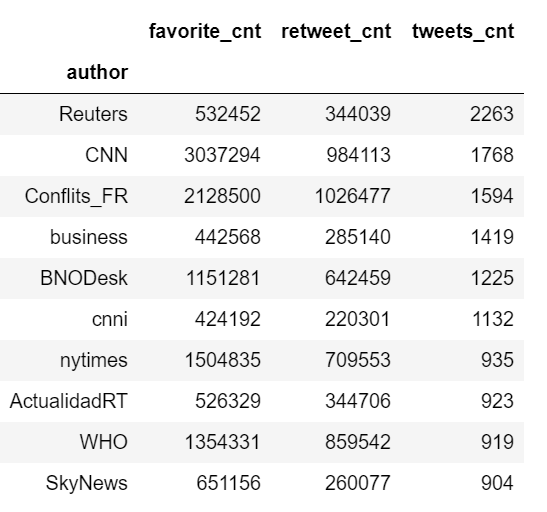

In [2]:
Image("pictures/EDA_twitter/active.PNG", width = 400, height = 300)

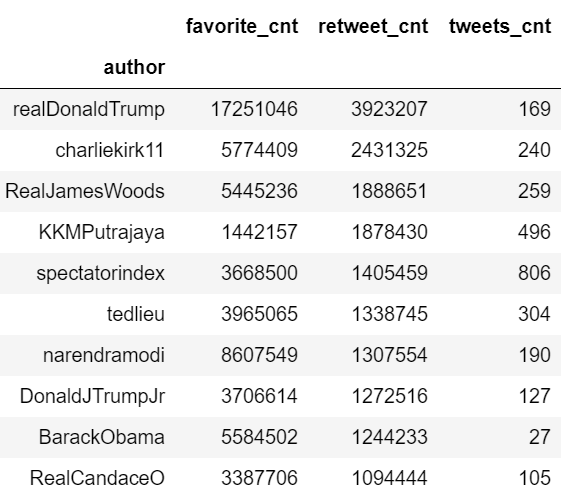

In [3]:
Image("pictures/EDA_twitter/popular.PNG", width = 400, height = 300)

We rank authors based of twitter number of favorite counts.  The results make sense inthat active authors tend to be press (Reuters, business, BNO, CNN, etc), while the popularusers tend to celebrities(Trump, Woods, etc)

Since we have the location information and language information,  we then take a look at what these distributions look like

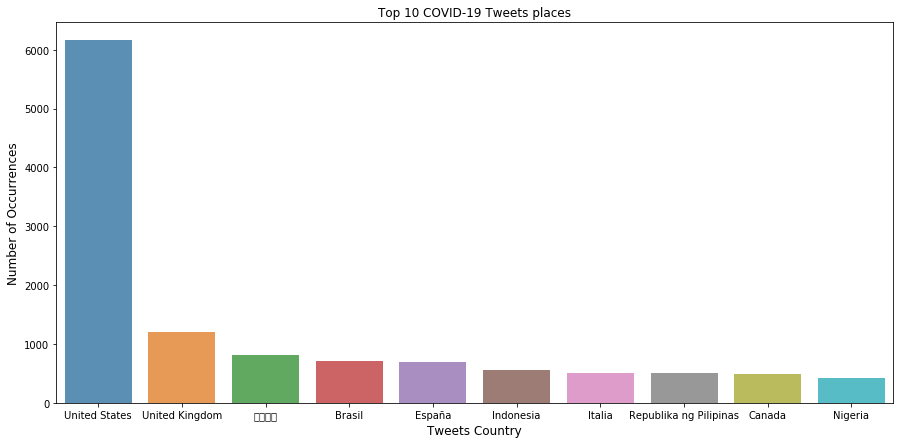

In [4]:
Image("pictures/EDA_twitter/Country.png", width = 400, height = 300)

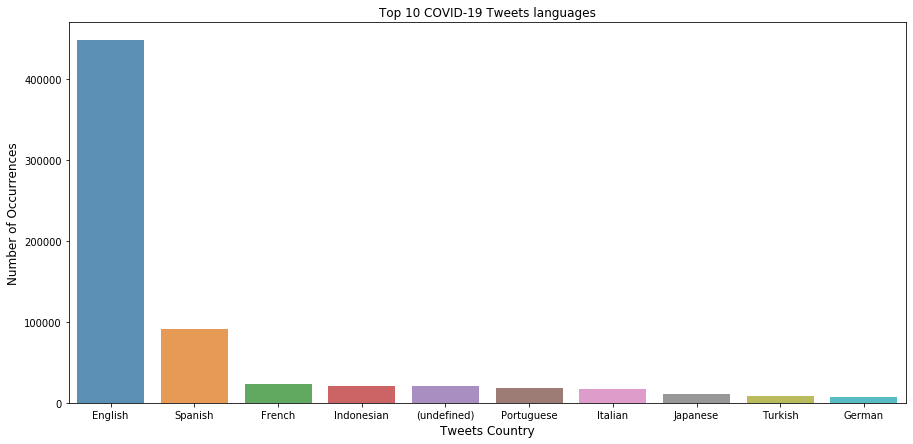

In [5]:
Image("pictures/EDA_twitter/languages.png", width = 400, height = 300)

We observe that most tweets do not have location information (only thousands of tweets have shared their locations).  Among tweets which have shared locations, US and UK are two  most  frequent  places,  followed  by  Brazil,  Indonesia,  etc.   This  is  related  to  the  user distribution.  For the language, most of the tweets are in English, while small portions arein Spanish, French, etc. In order to do the word count and feature engineering, we have to filter the English twitter.

We then take a look at the word use on tweets.  After cleaning, tokenizing and preprocessing,we draw a word cloud and filter the most frequent words in our dataset.  

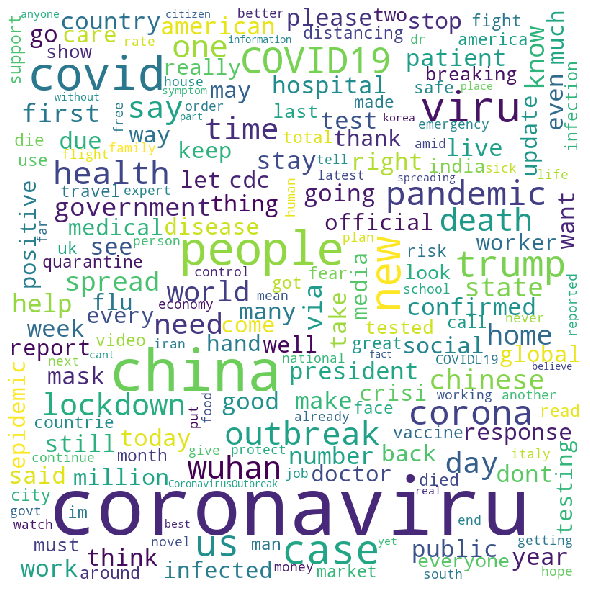

In [6]:
Image("pictures/EDA_twitter/wordCloud.png", width = 400, height = 300)

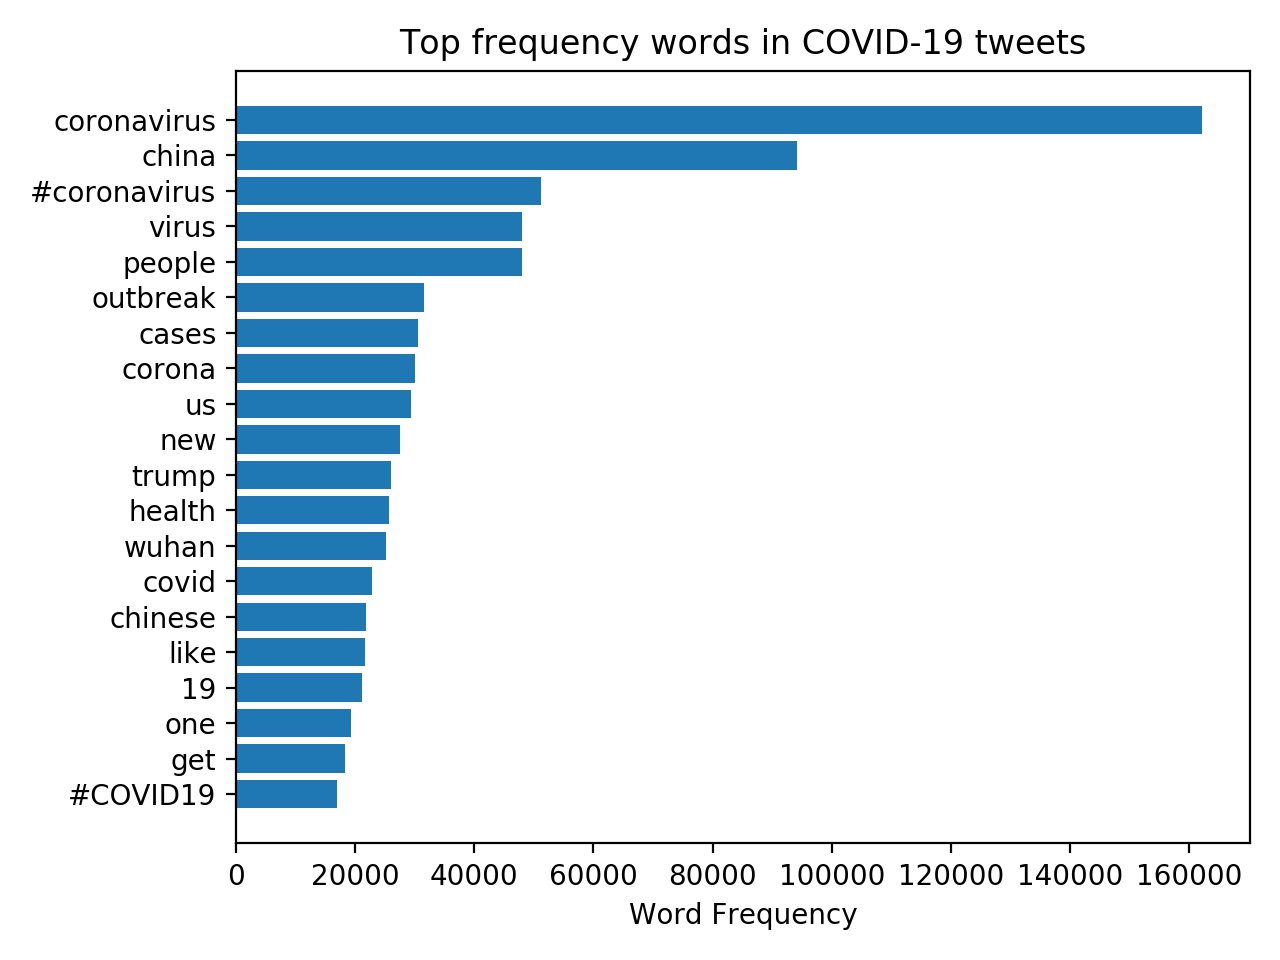

In [7]:
Image("pictures/EDA_twitter/word_freq.jpeg", width = 400, height = 300)

We can see that the word cloud tells us that the most frequent words are coronavirus, china, virus, people, outbreak, etc. These words are surly related to what we expected.

#### 2.2.2.2 Twitter timeseries data

Since our problem is related to time series, ultimately we are using some time series data. Here we plot two possible features: the twitter number and word use over time.

In [8]:
dat = pd.read_csv("../twitter_data/twitter_release.csv")
dat['date'] = pd.to_datetime(dat['date'])
dat.head()

,Chinawords,Italywords,USwords,Outbreakwords,date,str_date,twitter_number
0,1,0,2,0,2020-01-21 22:00:00,01-21 22:00,68
1,4,0,2,0,2020-01-21 23:00:00,01-21 23:00,156
2,1,0,2,0,2020-01-22 00:00:00,01-22 00:00,129
3,0,0,1,0,2020-01-22 01:00:00,01-22 01:00,128
4,1,0,3,0,2020-01-22 02:00:00,01-22 02:00,243


The keywords for different features are as follows:

In [9]:
keywords = [['china','wuhan','chinese'],['italy','italian','italia'],['us', 'trump','states'],['outbreak', 'spreading']]

In [ ]:
dates = list(dat['str_date'])
dates_ticks = [dates[i][:5] if i % (24*7) == 0 else '' for i in range(len(dates))]

f, ax = plt.subplots(1,1, figsize=(15,7))
ax.plot(dates, dat['twitter_number'])    
ax.set_xlabel('Date')
ax.set_ylabel('Number of tweets related to COVID-19 over time')
ax.set_xticklabels(dates_ticks)
ax.set_title('Number of tweets related to COVID-19 over time')

Text(0.5, 1.0, 'Number of tweets related to COVID-19 over time')

The overall flow of tweets number remain constant, which is contracy to the common belief. The possible reason is that the data provider can only collects tweets under the regulation of twitter terms of use, and thus the number is cut down.

In [ ]:
dates = list(dat['str_date'])
dates_ticks = [dates[i][:5] if i % (24*7) == 0 else '' for i in range(len(dates))]

f, ax = plt.subplots(1,1, figsize=(15,7))
cols = ['Chinawords','Italywords','USwords','Outbreakwords']
for col in cols:
    ax.plot(dates, dat[col], label=col)

ax.set_xlabel('Date')
ax.set_ylabel('Number of keywords related to COVID-19 over time')
ax.set_xticklabels(dates_ticks)
ax.legend()
ax.set_title('Number of keywords related to COVID-19 over time')

We can see that there are two peaks along the time axis: Jan 28 and Mar 4th, which corresponds to the outbreak in China and outbreak in US. The Italy has an outbreak around Feb, 20th.

For the word use over time, we can clearly see a different trend for China related words and US related words. These patterns can help us predict in the future models.

## 2.3 Weather Data

## 2.4 Google Trend Data

# 3. Predictive Models

## 3.1 Single source: SEIR

For the detailed notebook and original code, see [SEIR notebook](/notebooks/notebooks/SEIR_r_version.ipynb). Note that this is a r notebook.

Since the work is written in R, to avoid conflict with other notebooks, here we only put the keys ideas and conclusions. The original code is located in TODO.

### 3.1.1 Our SEIR Model

The usual defined SEIR model is:

$$
\begin{split}
\frac{dS}{dt} &= \mu N - \nu S - \frac{\beta SI}{N} \\
\frac{dE}{dt} &= \frac{\beta SI}{N} - \sigma E - \nu E \\
\frac {dI}{dt} &= \sigma E - \gamma I - \nu I \\
\frac {dR}{dt} &= \gamma I - \nu R
\end{split}
$$

Where $\sigma$ is the rate of progression to infectious, $\mu$ is the birth rate and $\nu$ is the death rate.

Here we make further assumptions:

1. There is no birth rate
2. The only deaths in the population is due to the virus; the death will only occur in the Infectious period.

Under such assumptions, the SEIR model can be reformulated as:

$$
\begin{split}
\frac{dS}{dt} &= -\frac{\beta SI}{N} \\
\frac{dE}{dt} &= \frac{\beta S I}{N} - \sigma E\\
\frac {dI}{dt} &= \sigma E - \gamma I - \nu I \\
\frac {dR}{dt} &= \gamma I
\end{split}
$$

Then the basic reproduction number could be calculated as follows. There are two infected compartments E and I that determine the stability of the equation. If we linearize it and then the characteristic equation is:

$$
z^2 + (\sigma + \gamma + \nu)z + (\gamma + \nu)\sigma - \sigma \beta S_0 = 0
$$

This equation has all roots with negative real parts if and only if each coefficients is positive. then:

$$
(\gamma + \nu)\sigma - \sigma \beta S_0 > 0 \Leftrightarrow \frac{\beta S_0}{\gamma + \nu} >1
$$

Taks $S_0 = 1$, the basic reprodution number $R_0 = \frac {\beta}{\gamma + \nu}$ 


Below is our implementation of SEIR (thanks to http://statnet.org/tut/NewDCMs.html#example_1:_seir_model)

```r
SEIR <- function(t, t0, parms) {
  with(as.list(c(t0, parms)), {
    
    # Population size, which is changing because people dies
    num <- s.num + e.num + i.num + r.num
    
    # Effective contact rate and FOI from a rearrangement of Beta * c * D
    ce <- R0 / i.dur # the people amount one could spread to before he recovers, the speed is that divide by i.dur
    lambda <- ce * i.num/num # when people dies more the infection rate is higher
    
    dS <- -lambda*s.num
    dE <- lambda*s.num - (1/e.dur)*e.num
    dI <- (1/e.dur)*e.num - (1 - cfr)*(1/i.dur)*i.num - cfr*(1/i.dur)*i.num
    dR <- (1 - cfr)*(1/i.dur)*i.num 
    
    # Compartments and flows are part of the derivative vector
    # Other calculations to be output are outside the vector, but within the containing list
    list(c(dS, dE, dI, dR, 
           se.flow = lambda * s.num,
           ei.flow = (1/e.dur) * e.num,
           ir.flow = (1 - cfr)*(1/i.dur) * i.num,
           d.flow = cfr*(1/i.dur)*i.num),
         num = num,
         i.prev = i.num / num,
         ei.prev = (e.num + i.num)/num)
  })
}
```

Here the definition is equivalent, which reparameterizing $\beta$ to the variable ```ce```, $\sigma$ to the  ```1/e.dur```, $\nu$ to ```cfr*(1/i.dur)``` and $\gamma$ to ```(1 - cfr)*(1/i.dur)```, the $r_0$ here is equivalent to $\beta *$ ```i.dur```.

```e.dur``` can be interpreted as the duration of the exposed state, ```i.dur``` is the duration of the infectious state, and ```cfr```is the case fatality rate expressed as a proportion of those who will die among those infected. Here we fix other 3 parameters based on paper:

```r
e.dur = 5.2
i.dur = 2.3
cfr = 0.05
```

Note that here we only fit SEIR on Infected status, and the definition of Infected status is as follows:

$$
\text{Infected} = \text{Positive} - \text{Recovered} - \text{Deaths}
$$

### 3.1.2 Model Fitting

Since SEIR model can only be solved via ode, we can not write the explicit form of the best estimator but to define a loss function.

The loss function we used for is sum or squared log error. Recall $y_{ij}$ is the infection number in state $i$ on the $j$th day, and $\hat{y_{ij}}$ is the predicted infected number of SEIR model, then:

$$
\text{Loss for state i} = \sum_j(\log(\hat y_{ij}) - \log(y_{ij}))^2
$$

Given loss function we can optim the function via a set of optization methods like Nelder and Mead("Nelder-Mead") or Byrd("L-BFGS-B") built in R ```optim```.

### 3.1.3 Stagewise model

We first take a look at the Infected number across states:

In [ ]:
Image("pictures/SEIR/trend1.png", width = 1000, height = 800)

And on the log scale:

In [ ]:
Image("pictures/SEIR/trend2.png", width = 1000, height = 800)

One could see in the plot that there's a clear linear growth from Apr-01 onward. On the other hand, with log scale in the second plot the exponential growth pattern is quite clear before May-15. 

With this observation, we assume a SEIR model at the begining and then transfer to simple linear growth. 

We define the following two-period model:

Two period model:

$$
\begin{split}
y[1:\text{knot}] &\sim \text{SEIR}(R_0) \\
y[\text{knot}:] &\sim k \cdot\text{days} + b
\end{split}
$$


The optimal tradeoff point can be found by simple grid search.

### 3.1.4 Fitting result and Visualization

In [ ]:
Image("pictures/SEIR/fit1.png", width = 1000, height = 800)

In [ ]:
Image("pictures/SEIR/fit2.png", width = 1000, height = 800)

In [ ]:
Image("pictures/SEIR/visualization.PNG", width = 1000, height = 800)

TODO

## 3.2 Single source:  ARIMA

## 3.3 Multiple source: Linear

## 3.4 Multiple source: RNN

# 4. Discussion

TODO

# 5. Conclusion

TODO

# Reference

[1]  E.  Chen,  K.  Lerman,  and  E.  Ferrara,  “Covid-19:  The  first  public  coronavirus  twitterdataset,”arXiv preprint arXiv:2003.07372, 2020.

[2] J.  Ginsberg,  M.  H.  Mohebbi,  R.  S.  Patel,  L.  Brammer,  M.  S.  Smolinski,  and  L.  Bril-liant, “Detecting influenza epidemics using search engine query data,”Nature, vol. 457,no. 7232, pp. 1012–1014, 2009.